# TP 1
## Parte 1 (imágenes en /white_patch y /coord_cromaticas)

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [1]:
import cv2 as cv
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

import glob

## Coordenadas cromáticas

La función `coord_crom` recibe una imagen y hace el pasaje a coordenadas cromáticas para eliminar las variaciones de contraste.

In [2]:
def divide_custom(a,b,default_value=0):
    # Divide dos arrays. en los casos que el divisor es cero, en vez de dividir se coloca el default_value
    return np.divide(a, b, where=b!=0, out=default_value * np.ones(a.shape, dtype=float))

def coord_crom(img):
    # Separamos la imagen en sus componentes B,G,R
    img_b, img_g, img_r = cv.split(img)
    
    # nuevos canales BGR
    tres_canales = img_r.astype('uint16') + img_g.astype('uint16') + img_b.astype('uint16')
    img_b_crom = divide_custom(img_b, tres_canales)
    img_g_crom = divide_custom(img_g, tres_canales)
    img_r_crom = divide_custom(img_r, tres_canales)
    
    # Combinamos los canales
    img_tmp = cv.merge((img_b_crom,img_g_crom,img_r_crom))

    # Normalizamos la imagen a una escala de 0-255
    img_crom = cv.normalize(img_tmp, img_tmp, 0, 255, cv.NORM_MINMAX).astype('uint8')

    return img_crom


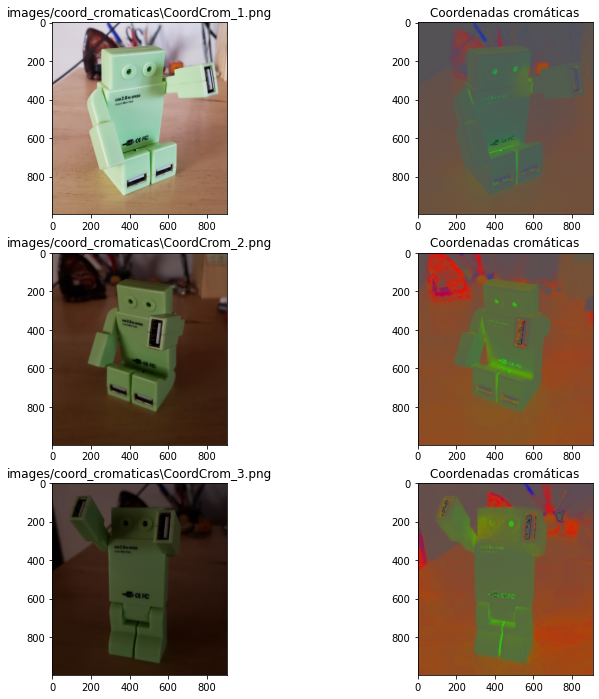

In [3]:
# Convertimos a coordenadas cromáticas y ploteamos todas las imágenes
image_names = glob.glob('images/coord_cromaticas/*.png')

i=0; n_rows = len(image_names)
plt.figure(figsize=[12, 4 * n_rows])

for image_name in image_names:
    img = cv.imread(image_name,cv.IMREAD_COLOR)
    img_cc = coord_crom(img)
    
    # Para plotear las pasamos a RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_cc = cv.cvtColor(img_cc, cv.COLOR_BGR2RGB)

    i+=1; plt.subplot(n_rows,2,i);plt.imshow(img);plt.title(image_name);
    i+=1; plt.subplot(n_rows,2,i);plt.imshow(img_cc);plt.title("Coordenadas cromáticas");

## White Patch

La función `White-patch` recibe una imagen y aplica el algoritmo white patch para eliminar las diferencias de color de iluminación.

In [4]:
def white_patch(img):
    #Normalizamos al color de la luz blanco puro (255, 255, 255)

    # Separamos la imagen en sus componentes B,G,R
    img_b, img_g, img_r = cv.split(img)
    
    max_blue = img_b.max()
    max_green = img_g.max()
    max_red = img_r.max()

    # nuevos canales BGR
    img_b_norm = ((255 / max_blue) * img_b).round().astype('uint8')
    img_g_norm = ((255 / max_green) * img_g).round().astype('uint8')
    img_r_norm = ((255 / max_red) * img_r).round().astype('uint8')
    
    # Combinamos los canales
    img_norm = cv.merge((img_b_norm,img_g_norm,img_r_norm))
    return img_norm


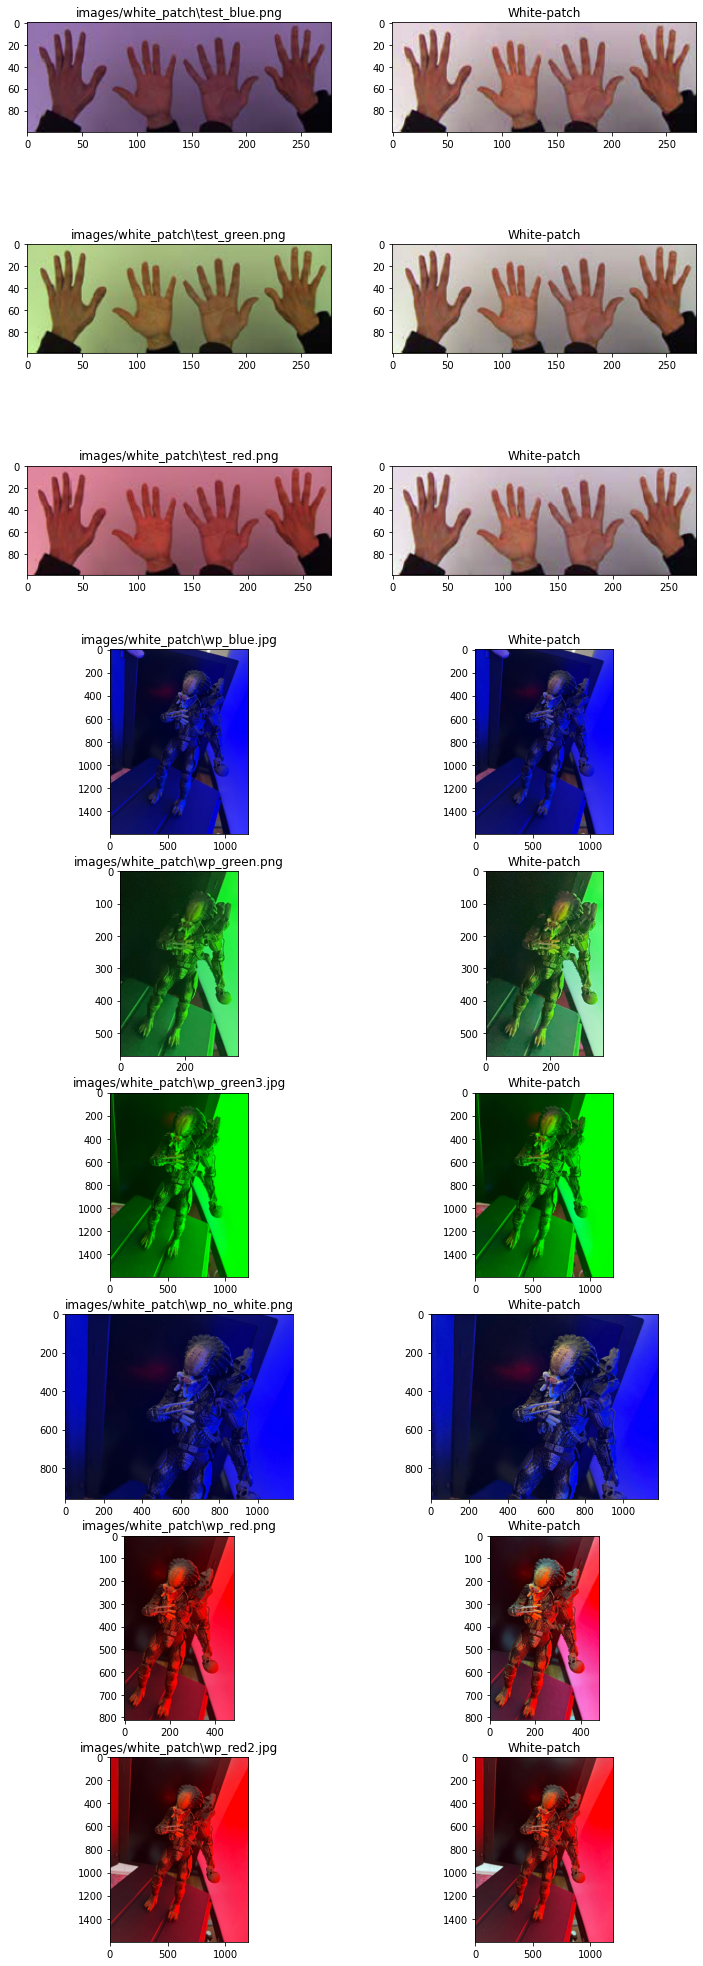

In [5]:
# Normalizamos y ploteamos todas las imágenes
image_names = glob.glob('images/white_patch/*')
image_names.sort()

i=0; n_rows = len(image_names)
plt.figure(figsize=[12, 4 * n_rows])

for image_name in image_names:
    img = cv.imread(image_name,cv.IMREAD_COLOR)
          
    img_norm = white_patch(img)
    
    # Para plotear las pasamos a RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_norm = cv.cvtColor(img_norm, cv.COLOR_BGR2RGB)

    i+=1; plt.subplot(n_rows,2,i);plt.imshow(img);plt.title(image_name);
    i+=1; plt.subplot(n_rows,2,i);plt.imshow(img_norm);plt.title("White-patch");
    

A simple vista, la imagen wp_blue.jpg no sufrió modificaciones al aplicar el algoritmo. Esto puede suceder cuando una imagen tiene pixeles blancos lo cual hace que el algoritmo no modifique ninguno de los valores de entrada (el valor original es multiplicado por  255/255 = 1). Vamos a verificar si este es el caso.

In [6]:
image_names = glob.glob('images/white_patch/*')
image_names.sort()

for image_name in image_names:
    img = cv.imread(image_name,cv.IMREAD_COLOR)

    img_b, img_g, img_r = cv.split(img)
    max_blue = img_b.max()
    max_green = img_g.max()
    max_red = img_r.max()
    info=f"{image_name} - max blue:{max_blue} - max green: {max_green} - max red:{max_red}"

    if (max_blue == 255 and max_green == 255 and max_red == 255):
        filas = img.shape[0]
        columnas = img.shape[1]
        whites = [ [r,c] for r in range(filas) for c in range(columnas) if (img_b[r,c] ==255 and img_g[r,c] ==255 and img_r[r,c] ==255)]
        print(info + f". Esta imagen tiene {len(whites)} pixeles blancos.")
    else: 
        print(info)

images/white_patch\test_blue.png - max blue:200 - max green: 138 - max red:165
images/white_patch\test_green.png - max blue:171 - max green: 250 - max red:210
images/white_patch\test_red.png - max blue:175 - max green: 157 - max red:247
images/white_patch\wp_blue.jpg - max blue:255 - max green: 255 - max red:255. Esta imagen tiene 3 pixeles blancos.
images/white_patch\wp_green.png - max blue:155 - max green: 252 - max red:126
images/white_patch\wp_green3.jpg - max blue:172 - max green: 255 - max red:170
images/white_patch\wp_no_white.png - max blue:255 - max green: 166 - max red:168
images/white_patch\wp_red.png - max blue:122 - max green: 134 - max red:255
images/white_patch\wp_red2.jpg - max blue:203 - max green: 201 - max red:255


Se comprueba la suposición de que esta imagen tenía pixeles blancos.